In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
covid=pd.read_csv(r"C:\Users\HP 820\Desktop\covid_19_clean_complete_2022.csv" )

In [4]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
covid.shape

(214894, 10)

In [6]:
covid.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214894 entries, 0 to 214893
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  65705 non-null   object 
 1   Country/Region  214894 non-null  object 
 2   Lat             213348 non-null  float64
 3   Long            213348 non-null  float64
 4   Date            214894 non-null  object 
 5   Confirmed       214894 non-null  int64  
 6   Deaths          214894 non-null  int64  
 7   Recovered       214894 non-null  int64  
 8   Active          214894 non-null  int64  
 9   WHO Region      212575 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.4+ MB


In [8]:
covid.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,213348.000000,213348.000000,2.148940e+05,214894.000000,2.148940e+05,2.148940e+05
mean,20.528131,22.735337,4.578132e+05,9310.764693,1.079987e+05,3.405037e+05
std,25.899139,76.304185,2.708770e+06,47497.835275,8.470111e+05,2.516382e+06
min,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,6.426991,-27.932425,2.530000e+02,2.000000,0.000000e+00,1.600000e+01
50%,22.233350,21.752000,5.223000e+03,71.000000,4.500000e+01,1.243000e+03
75%,41.166070,88.658375,9.892275e+04,1675.000000,5.115750e+03,2.644675e+04
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


In [9]:
covid.isnull().sum()

Province/State    149189
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region          2319
dtype: int64

In [10]:
covid["Date"]=pd.to_datetime(covid["Date"])

In [11]:
covid["Date"]

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
214889   2022-03-04
214890   2022-03-04
214891   2022-03-04
214892   2022-03-04
214893   2022-03-04
Name: Date, Length: 214894, dtype: datetime64[ns]

In [12]:
covid["Lat"]=covid["Lat"].fillna(covid["Lat"].mean())

In [13]:
covid["Long"]=covid["Long"].fillna(covid["Long"].mean())

In [14]:
covid["WHO Region"]=covid["WHO Region"].fillna(covid["WHO Region"].mode()[0])

In [15]:
covid.isnull().sum()

Province/State    149189
Country/Region         0
Lat                    0
Long                   0
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region             0
dtype: int64

In [16]:
##grouping dft types of cases as per the date
datewise=covid.groupby(['Date']).agg({"Confirmed":"sum","Deaths":"sum","Recovered":"sum"})

In [17]:
datewise.shape

(773, 3)

In [18]:
datewise.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,557,17,30
2020-01-23,657,18,32
2020-01-24,944,26,39
2020-01-25,1437,42,42
2020-01-26,2120,56,56


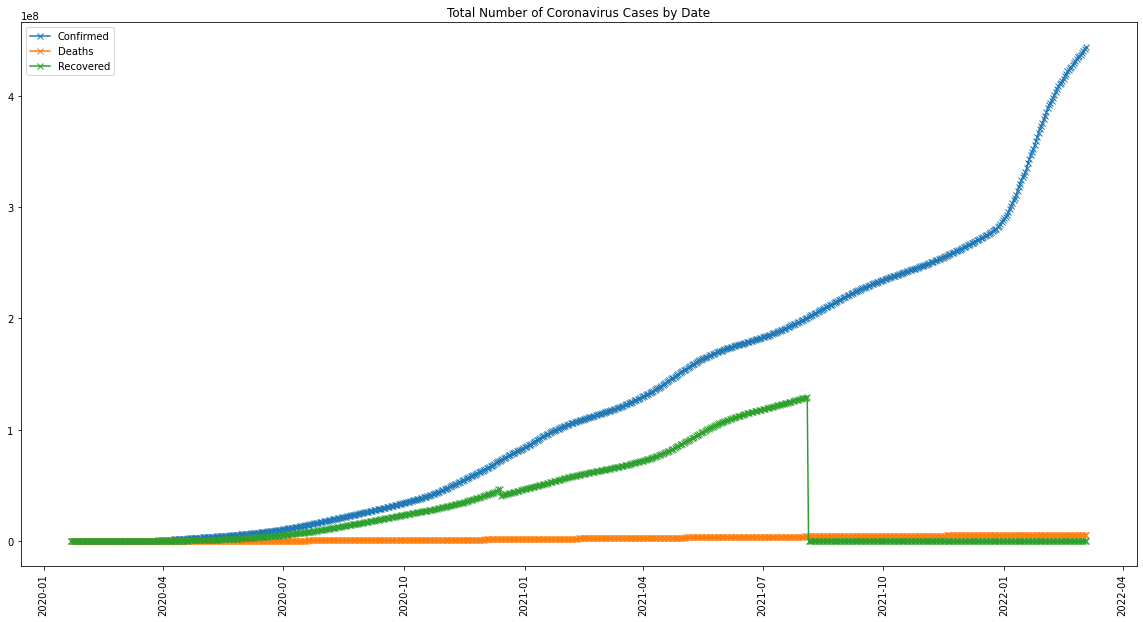

In [19]:
plt.figure(figsize=(20,10))
plt.plot(datewise, marker='x')
plt.title("Total Number of Coronavirus Cases by Date")
plt.legend(datewise.columns)
plt.xticks(rotation=90)
plt.show()

In [20]:
countries_grouped=covid.groupby("Country/Region")["Confirmed","Recovered","Deaths"].sum().reset_index()
plt.figure(figsize=(10,8))
temp=countries_grouped[["Country/Region","Deaths"]]
temp=temp.sort_values(by="Deaths",ascending=False)
temp=temp[temp["Deaths"]>0]
temp.style.background_gradient(cmap="Oranges_r")

C:\Users\HP 820\AppData\Local\Temp\ipykernel_14440\1436441734.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  countries_grouped=covid.groupby("Country/Region")["Confirmed","Recovered","Deaths"].sum().reset_index()


,Country/Region,Deaths
182,US,327637451
24,Brazil,236486341
80,India,169951477
114,Mexico,119660163
137,Peru,90986268
143,Russia,81614471
186,United Kingdom,68200938
86,Italy,63421785
62,France,56101750
38,Colombia,48482685


<Figure size 720x576 with 0 Axes>

In [21]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world",datewise["Deaths"].iloc[-3])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
Total number of Confirmed cases around the world 443760741
Total number of Recovered cases around the world 0
Total number of Deaths cases around the world 5972604
Total number of Active cases around the world 437770986
Total number of Closed cases around the world 5989755


In [22]:
#datewise["Active cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]

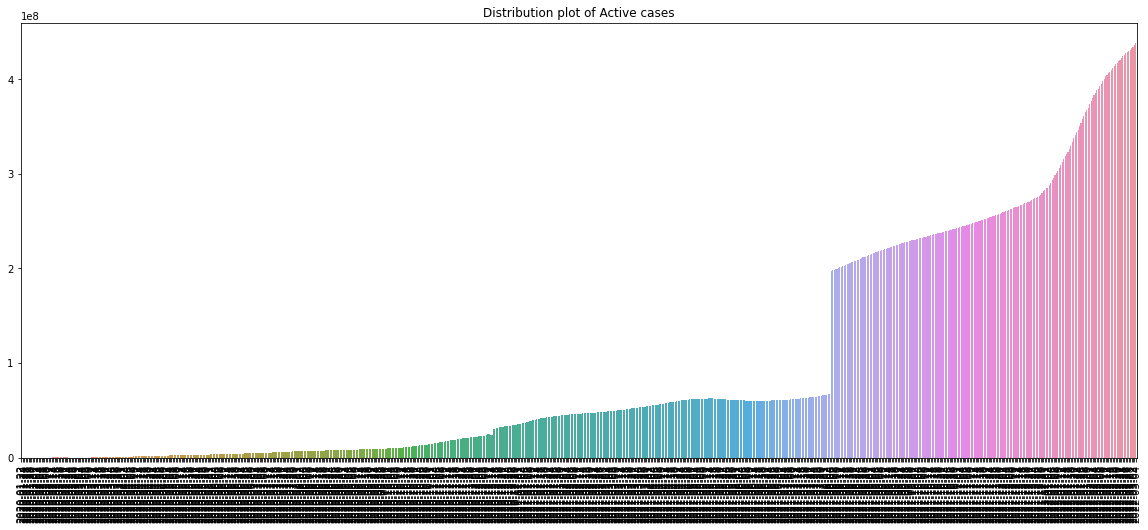

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot of Active cases")
plt.xticks(rotation=90)
plt.show()

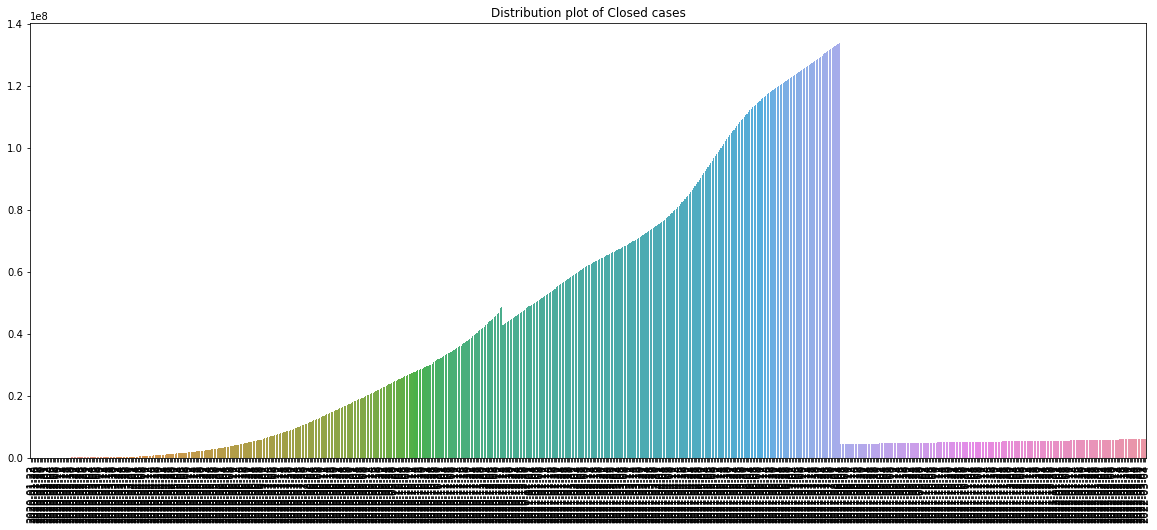

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot of Closed cases")
plt.xticks(rotation=90)
plt.show()

C:\Users\HP 820\AppData\Local\Temp\ipykernel_14440\1651210164.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise["WeekofYear"]=datewise.index.weekofyear
C:\Users\HP 820\AppData\Local\Temp\ipykernel_14440\1651210164.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


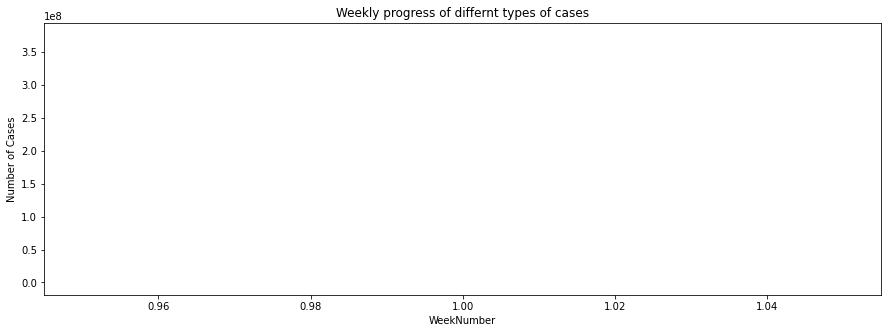

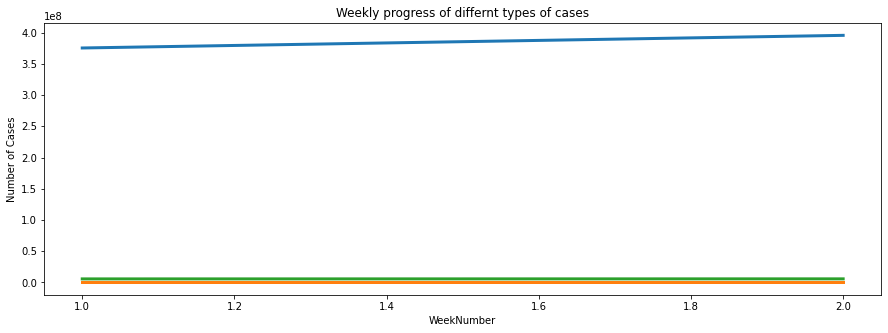

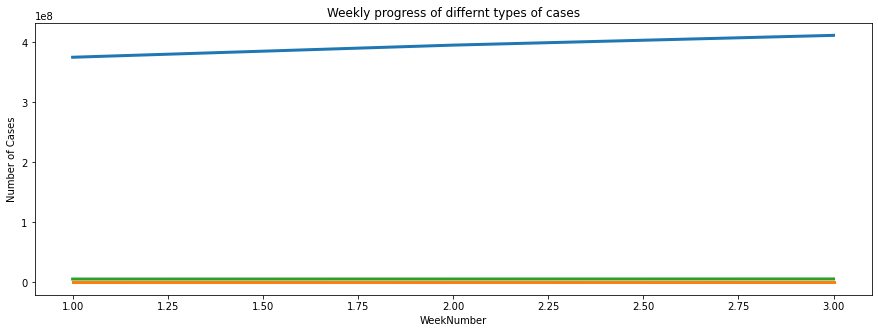

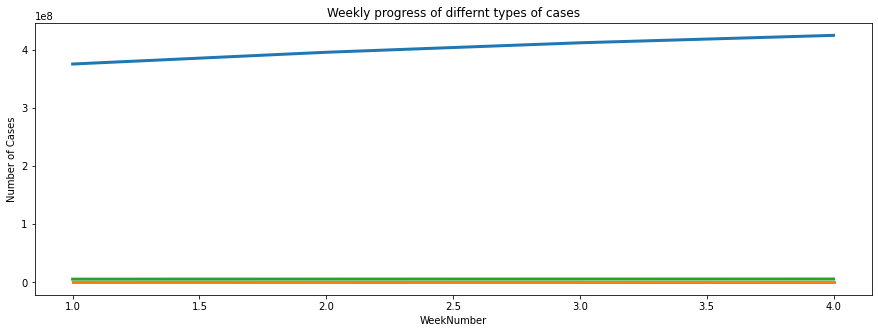

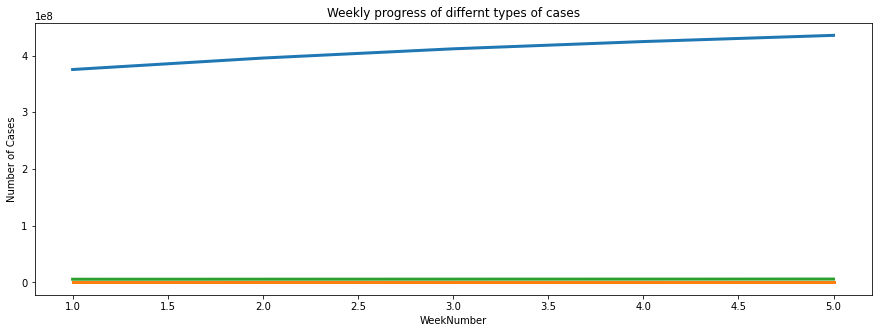

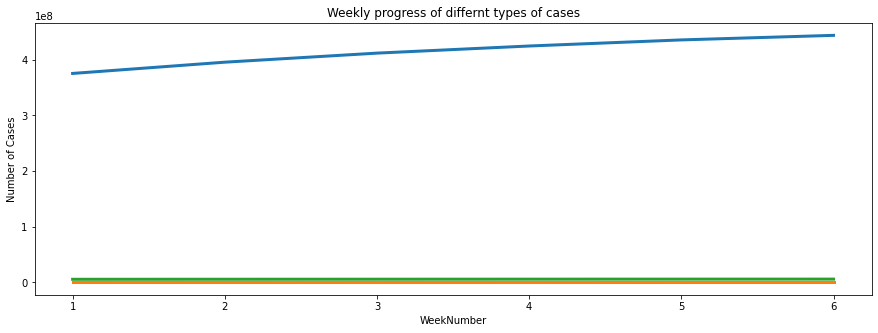

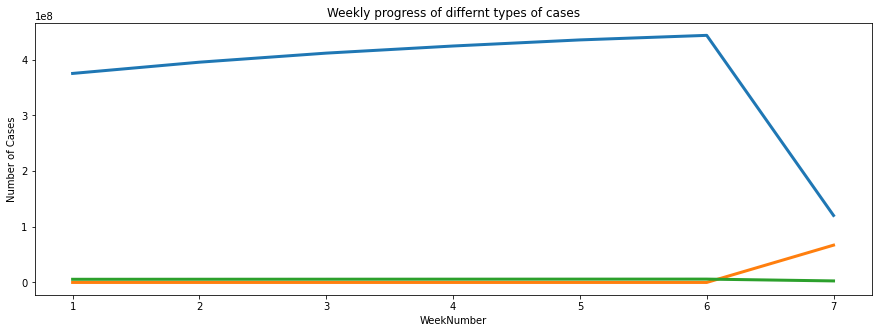

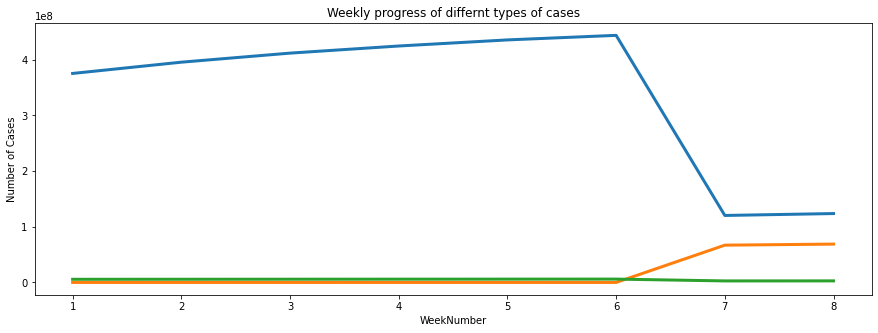

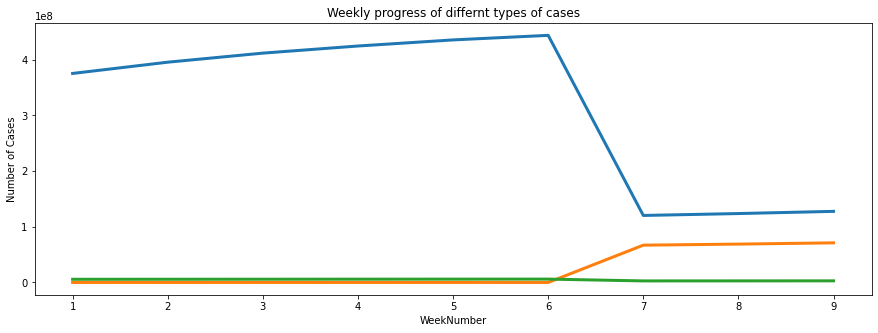

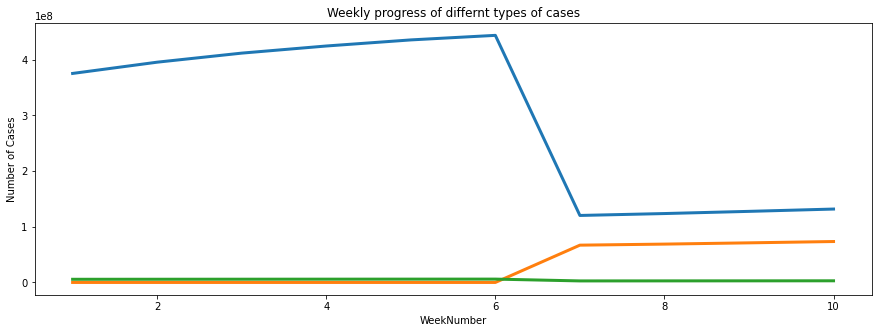

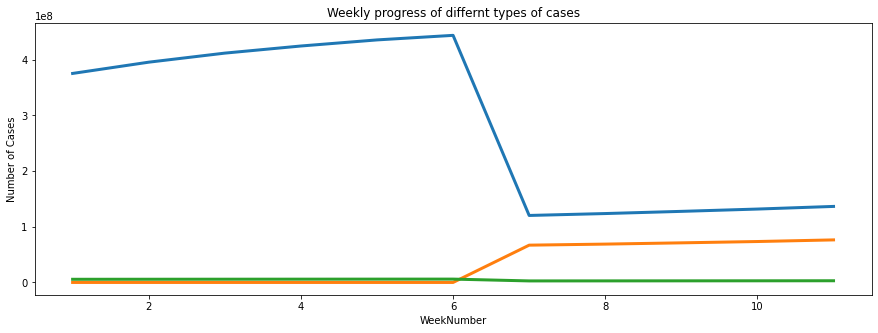

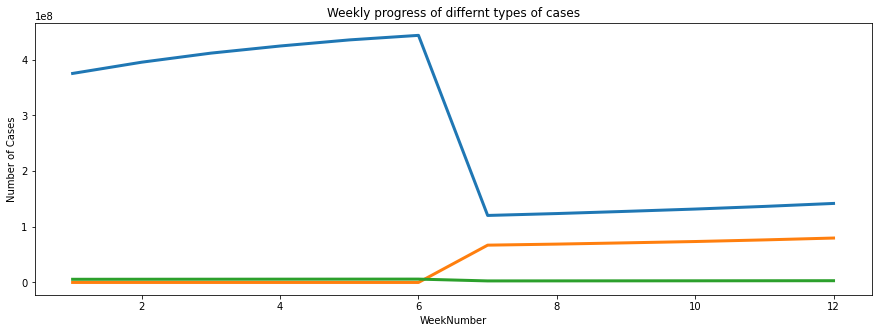

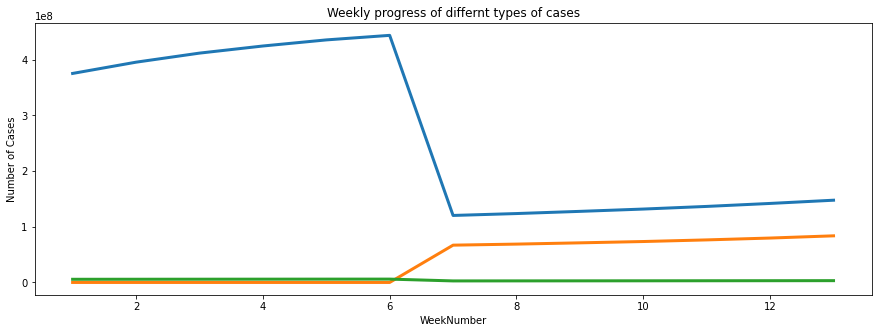

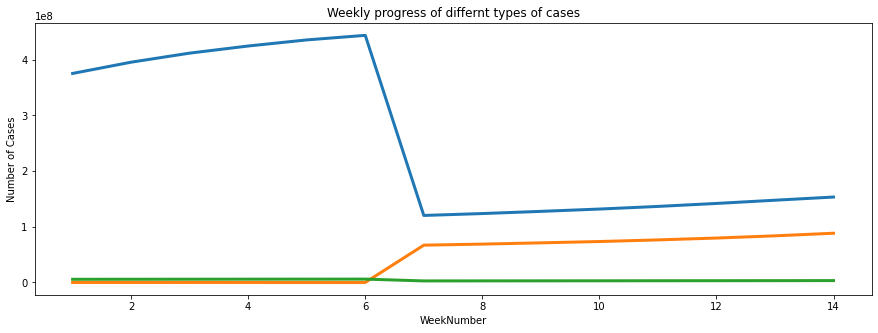

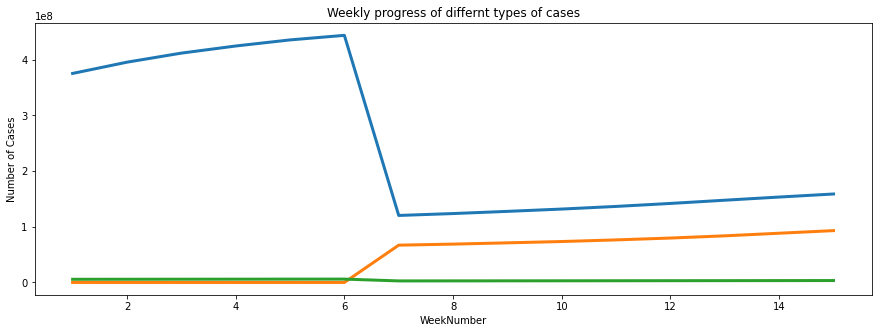

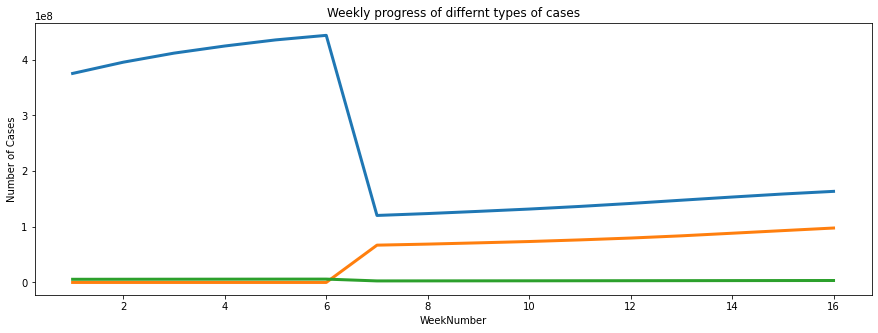

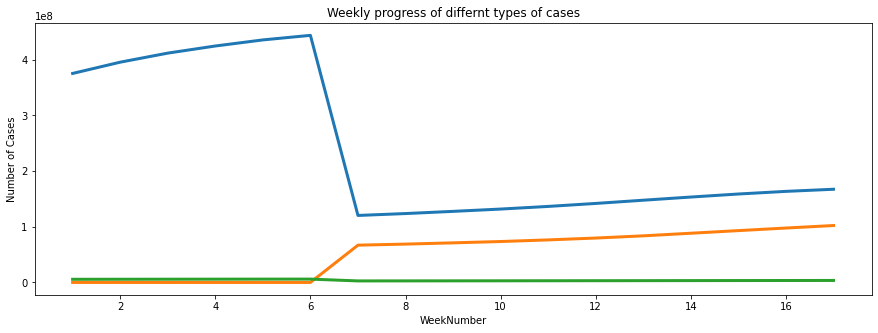

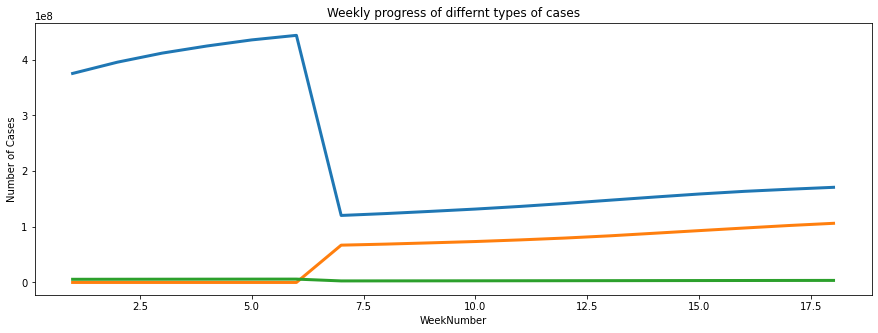

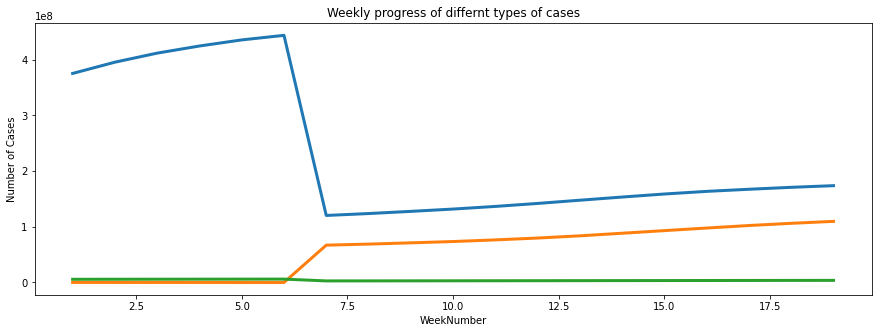

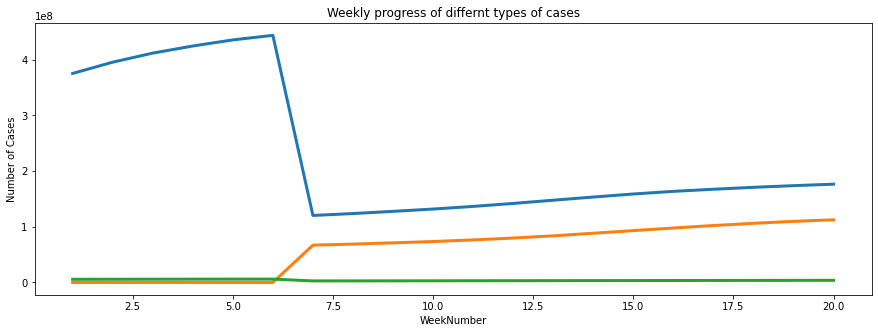

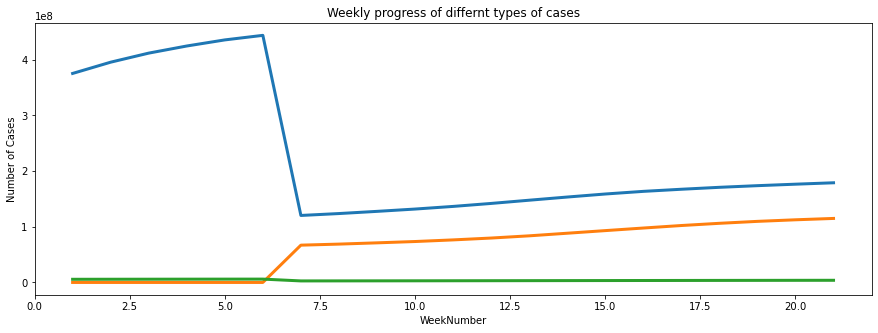

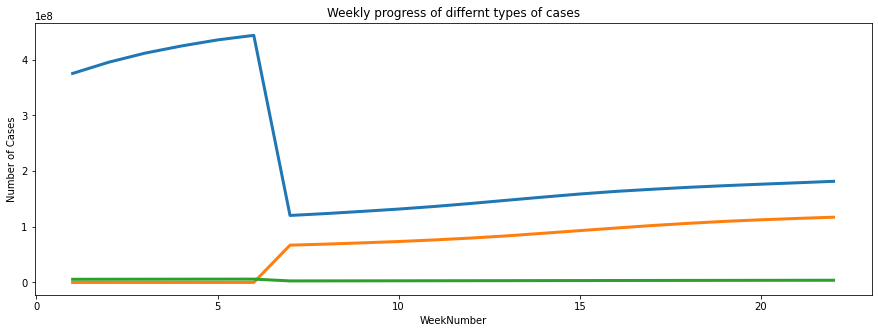

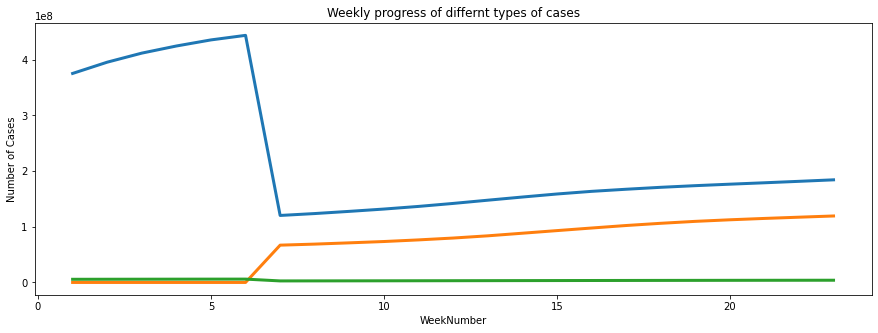

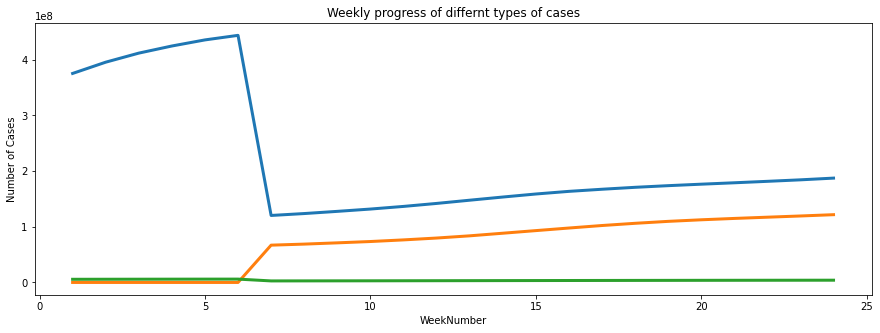

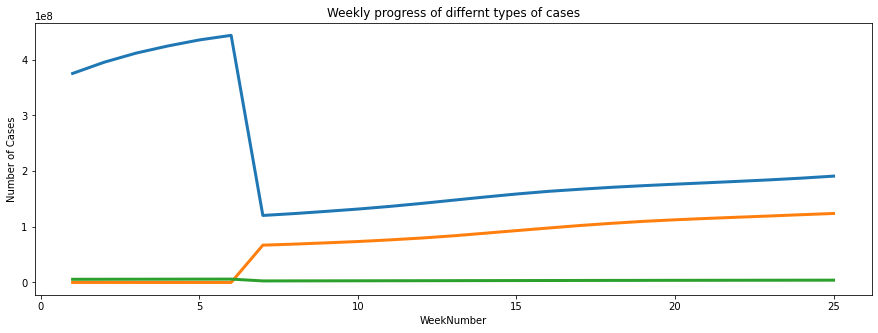

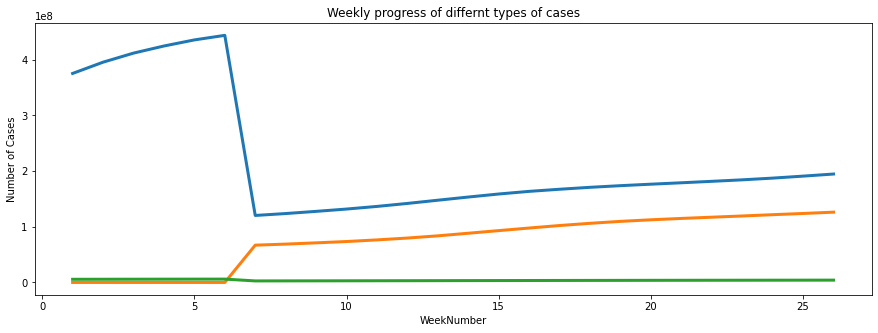

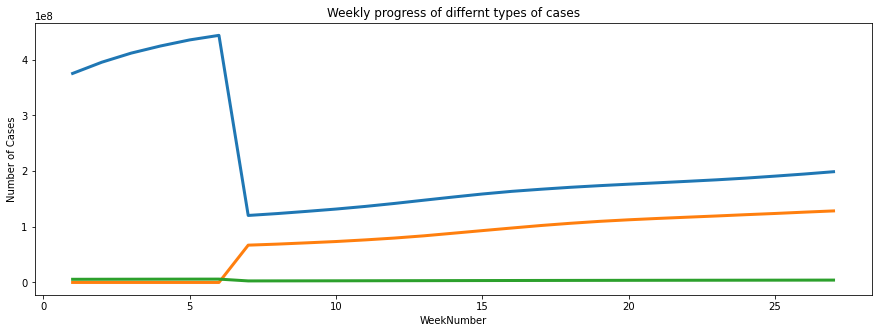

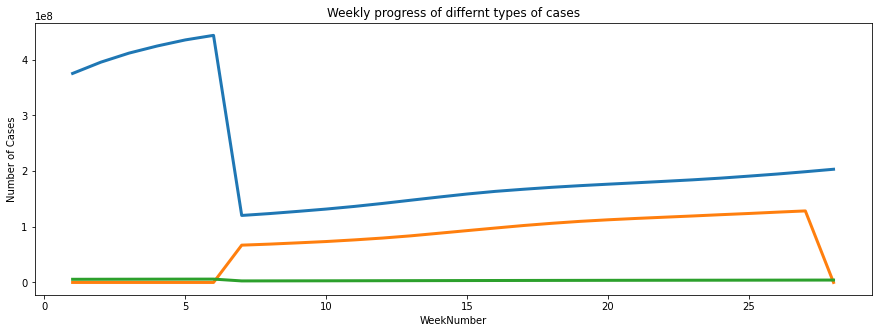

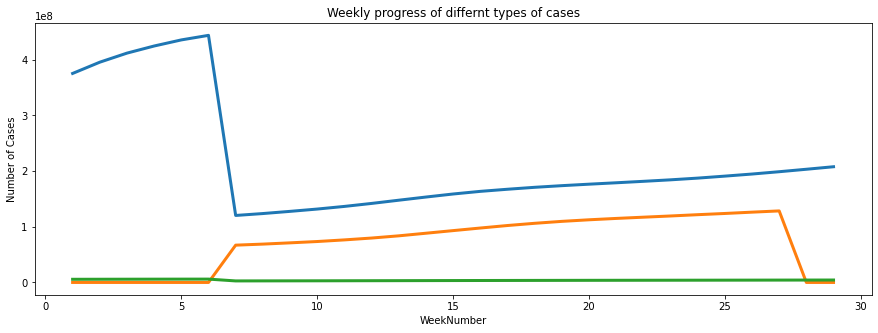

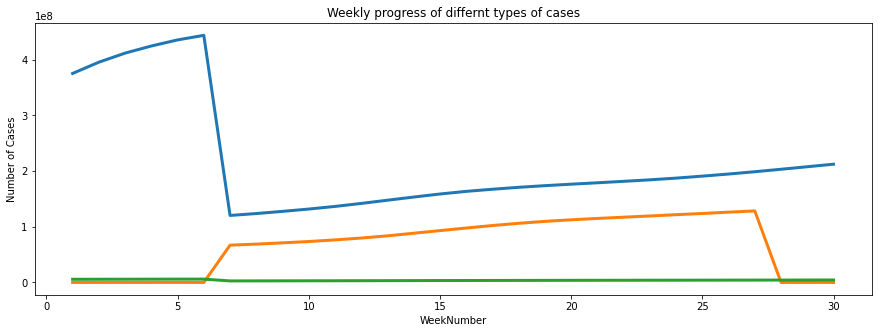

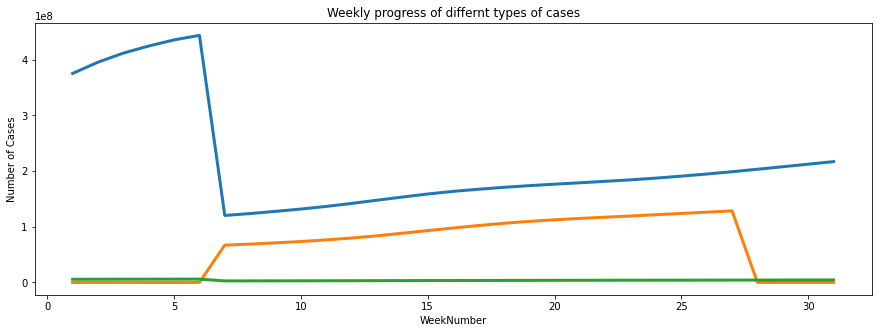

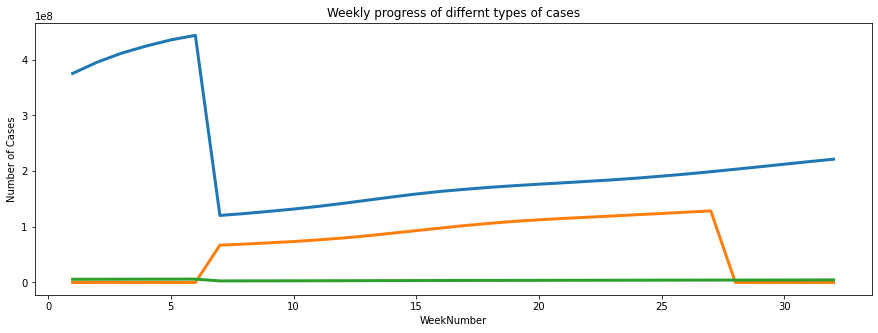

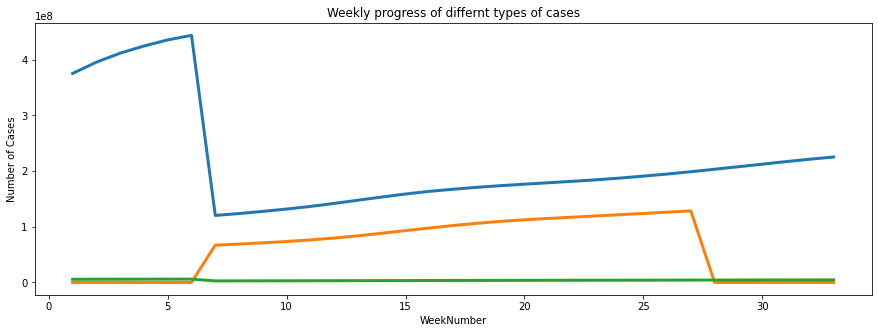

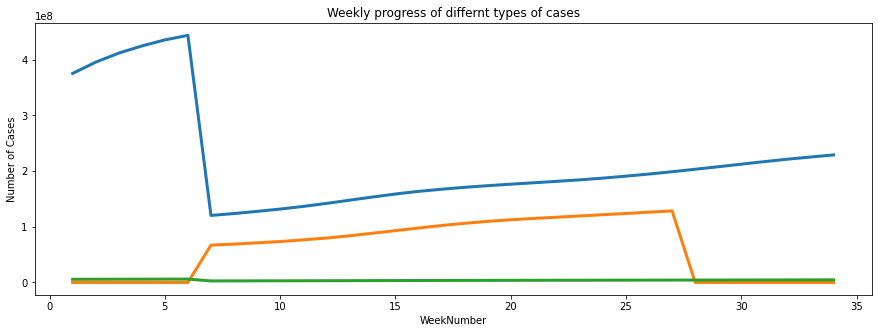

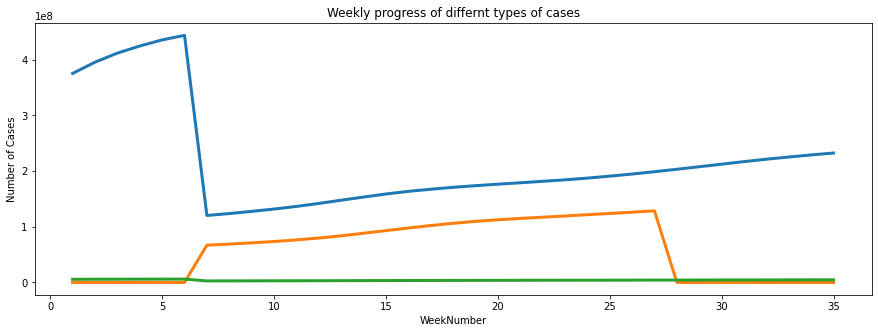

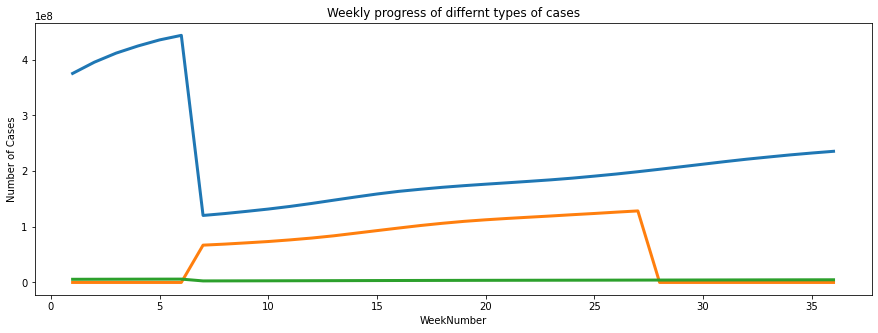

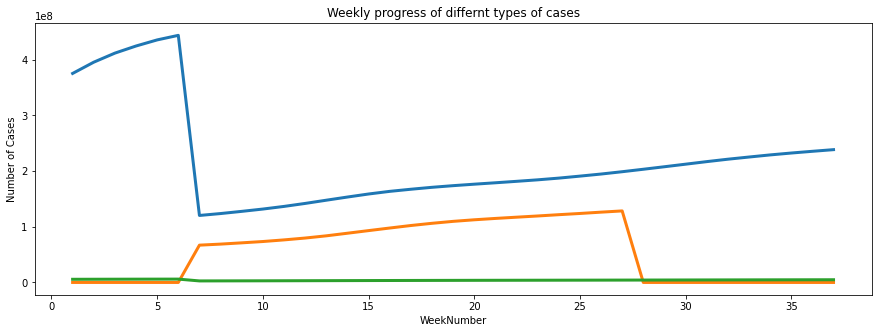

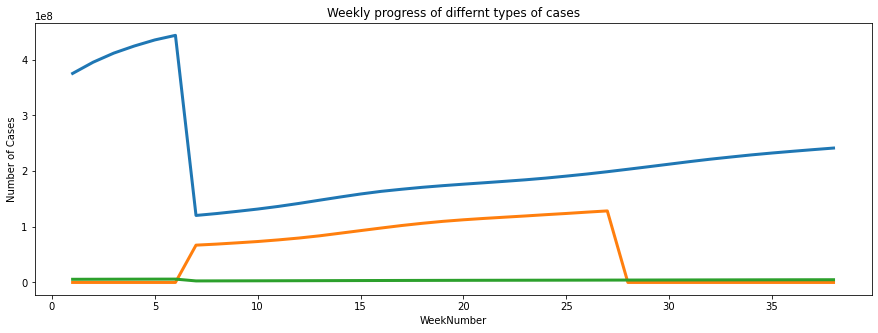

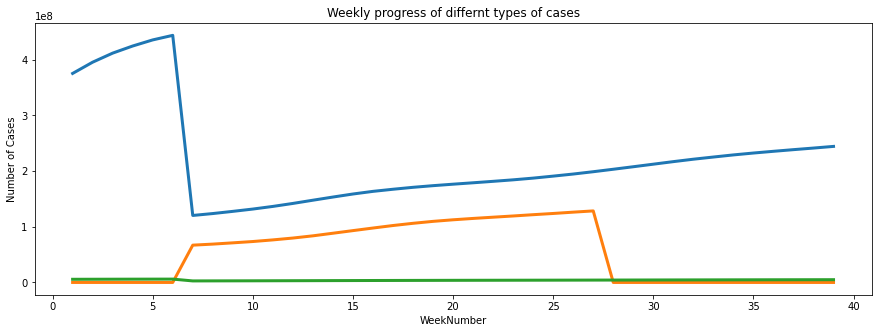

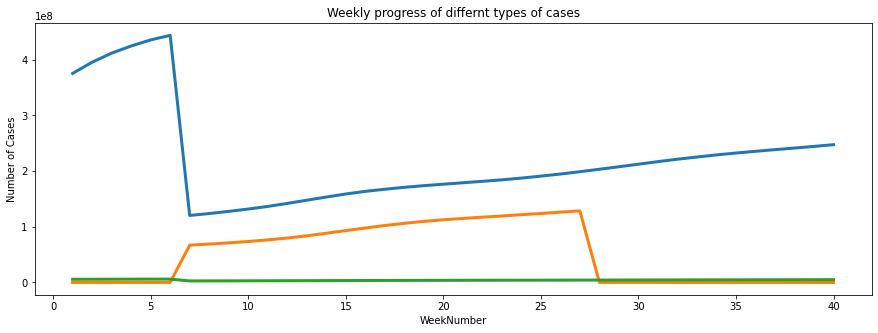

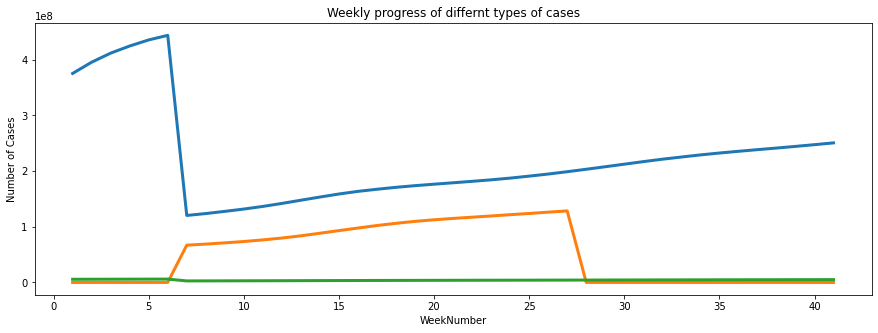

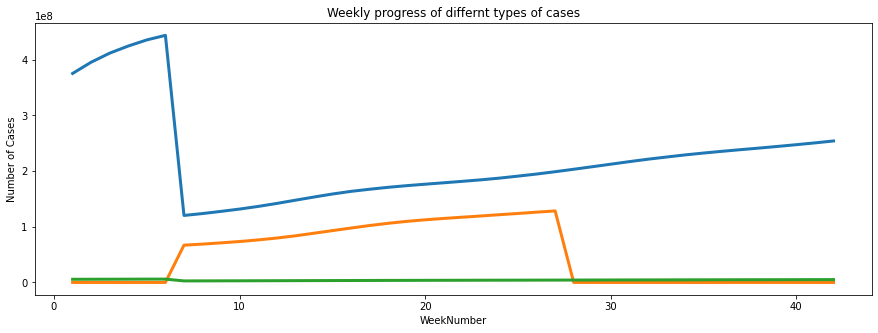

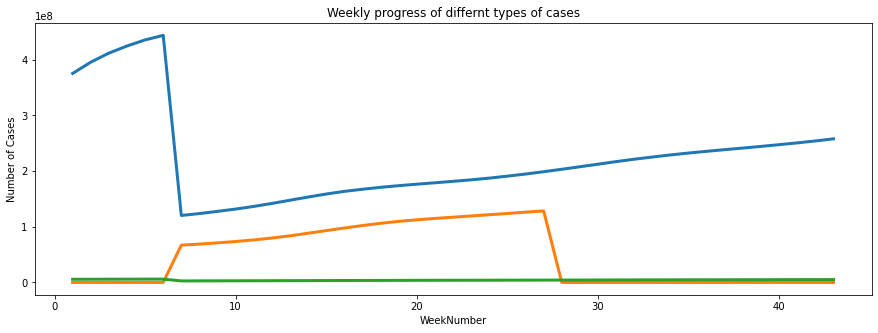

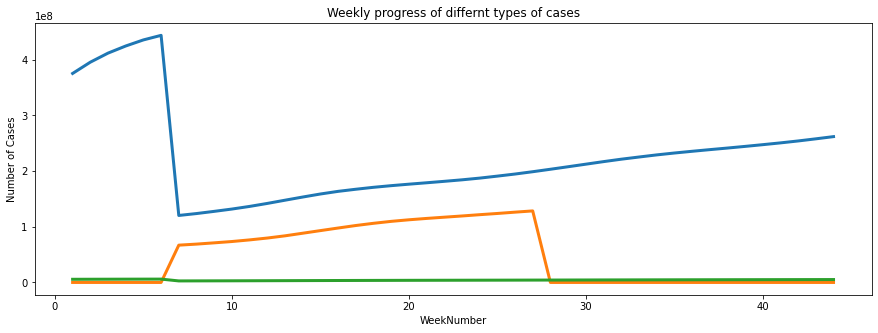

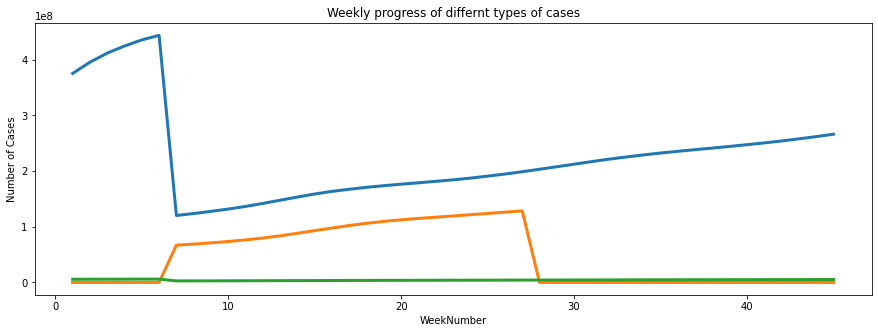

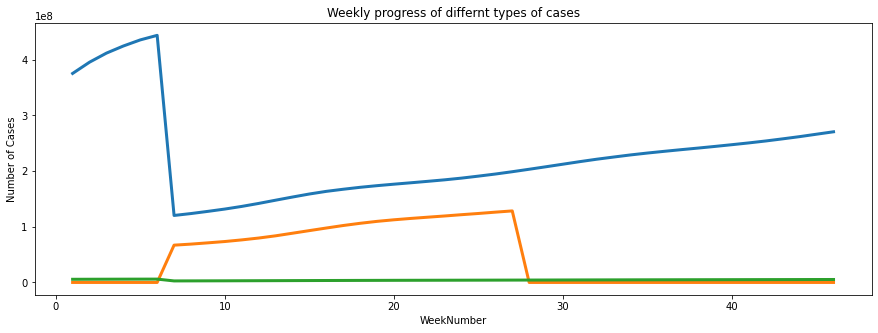

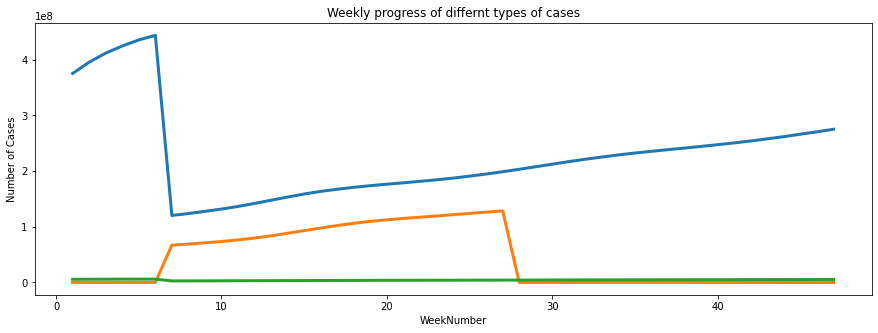

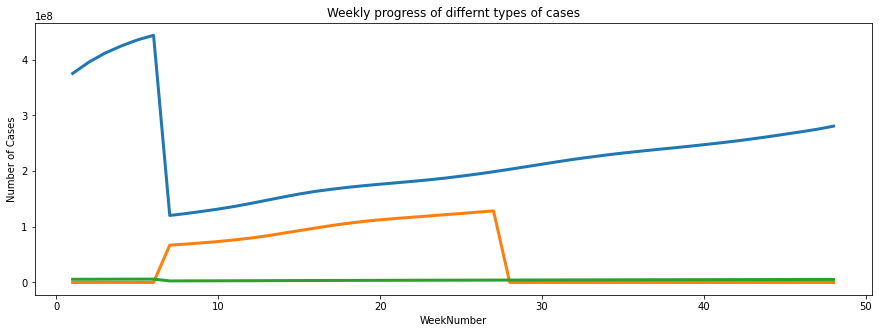

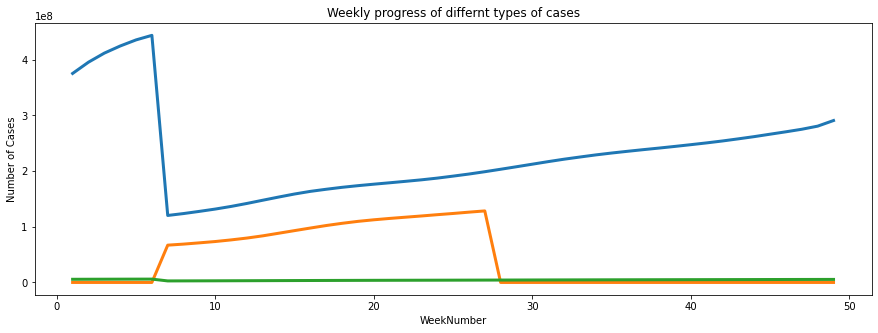

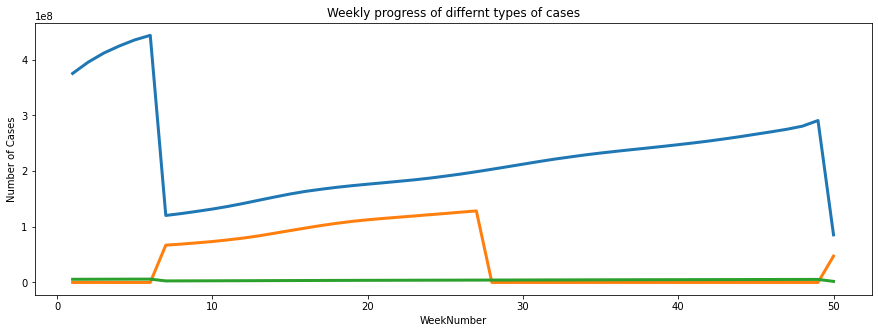

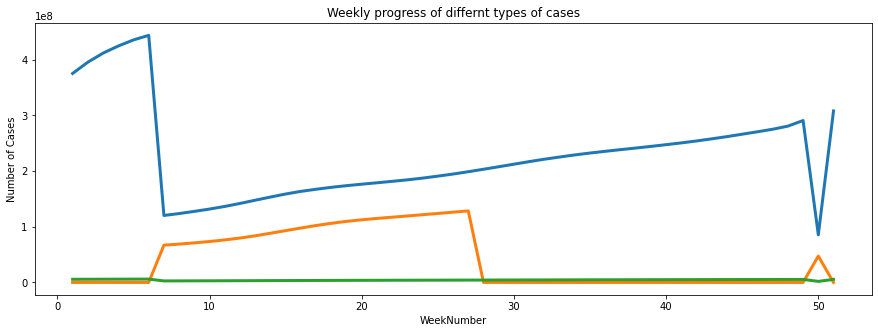

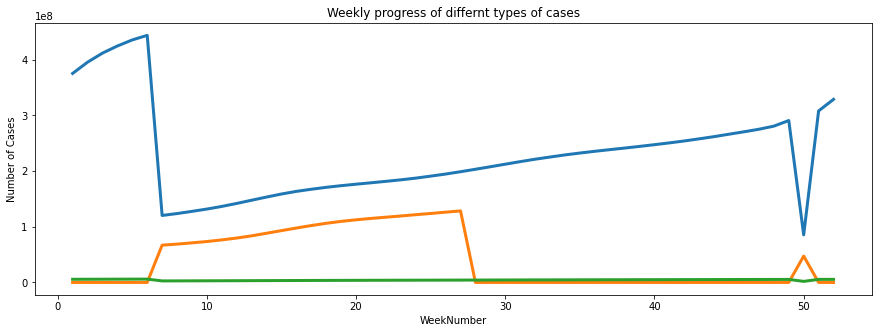

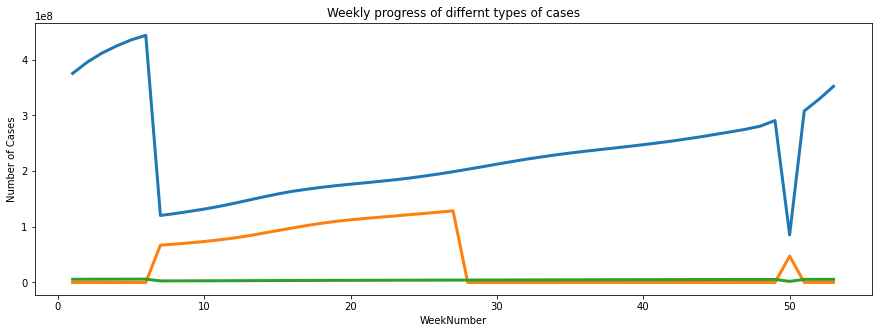

In [26]:
datewise["WeekofYear"]=datewise.index.weekofyear
Week_No=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list (datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    Week_No.append(w)
    w=w+1
    plt.figure(figsize=(15,5))
    plt.plot(Week_No,weekwise_confirmed,linewidth=3)
    plt.plot(Week_No,weekwise_recovered,linewidth=3)
    plt.plot(Week_No,weekwise_deaths,linewidth=3)
    plt.xlabel("WeekNumber")
    plt.ylabel("Number of Cases")
    plt.title("Weekly progress of differnt types of cases")
    

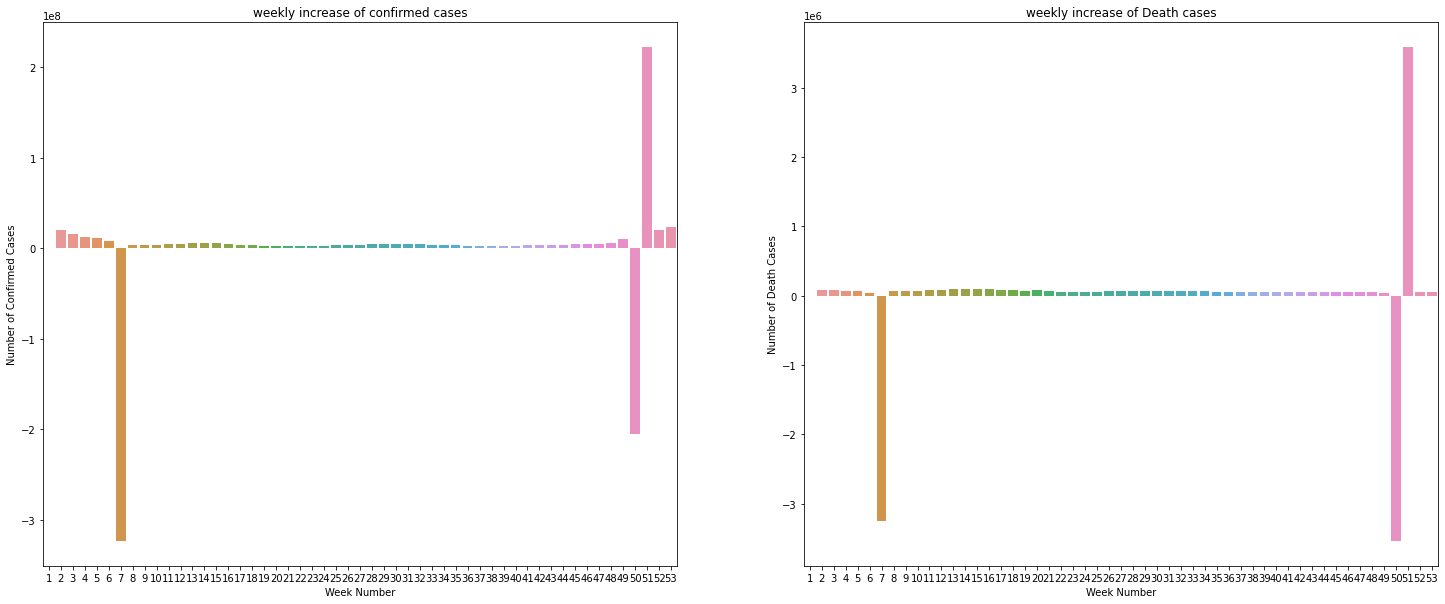

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
sns.barplot(x= Week_No,y=pd.Series(weekwise_confirmed).diff(),ax=ax1)
sns.barplot(x= Week_No,y=pd.Series(weekwise_deaths).diff(),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("weekly increase of confirmed cases")
ax2.set_title("weekly increase of Death cases")
plt.show()

Everyday_Avarage increase of confirmed cases 574075.0
Everyday_Avarage increase of recovered cases -0.0
Everyday_Avarage increase of death cases 7749.0


(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.,
        18993., 19083.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

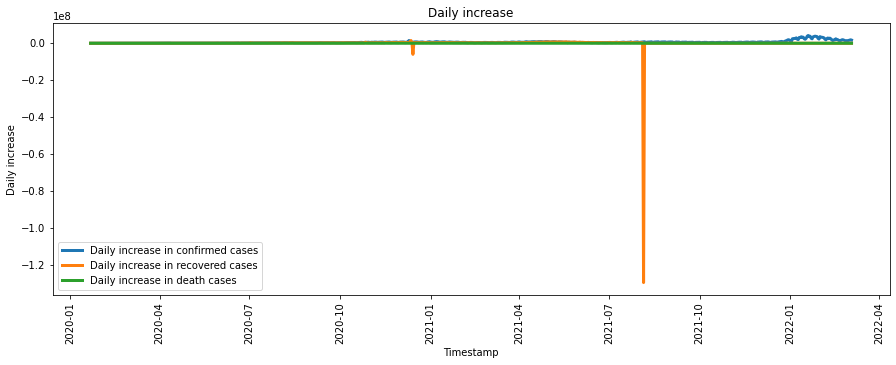

In [28]:
print("Everyday_Avarage increase of confirmed cases",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Everyday_Avarage increase of recovered cases",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Everyday_Avarage increase of death cases",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,5))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)

Everyday_Avarage increase of confirmed cases 1.0
Everyday_Avarage increase of recovered cases 0.0
Everyday_Avarage increase of death cases 0.0


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

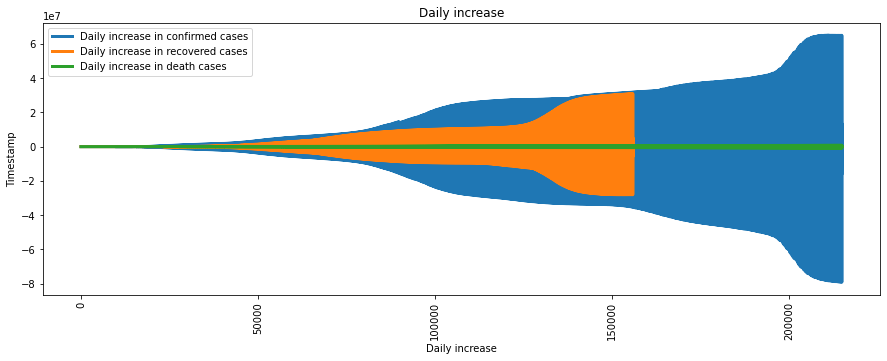

In [29]:
print("Everyday_Avarage increase of confirmed cases",np.round(covid["Confirmed"].diff().fillna(0).mean()))
print("Everyday_Avarage increase of recovered cases",np.round(covid["Recovered"].diff().fillna(0).mean()))
print("Everyday_Avarage increase of death cases",np.round(covid["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,5))
plt.plot(covid["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(covid["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(covid["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Daily increase")
plt.ylabel("Timestamp")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)